# FCS Tutoring Session 7

Welcome to our seventh exercise session. Until now, we have seen how we write software in Python. However, this is only one part of the whole story. Another big part is this Artificial Intelligence, Data Science, Machine Learning, Deep Learning and soon the robots will take over anyway BS. :)

Everytime we hear these fancy terms in the newspaper and media and business executives think they clearly understand why Andrej Karpathy was not able yet to make the Tesla autopilot working yet, although they might don't even know what regression analysis or a CNN works :)

That's why I believe that you can benefit a lot from the topics taught in the following weeks in this course. Because handling and analysing data is a crucial skills in todays business world.

So what we are going to do in the next weeks is to dive into the world of data, starting with simple data analysis today and going further on to supervised and unsupervised machine learning. Today we start with simple data handling tasks.


For any questions please contact me on Slack.

Janick Spirig, 22.04.2021




## Which striker should we buy?

Let's imagine we are the manager of Real Madrid and we want to buy a new striker for the upcoming season form the Premier League. Of course, we are biased as we really like some players playing in England more than others. However, we can not base such an important decision on our gut feeling.
Therefore, we need to analyse the available data to make an objective decision.

### Data loading

First thing we need to do is to load the player stats of the players in the Premier League from the season 2019/2020. Luckily, one guy has scraped this data and made publicly available ([Link](https://www.kaggle.com/themlphdstudent/premier-league-player-stats-data)).

To make things a bit trickier, I converted the .csv file to .txt - let's load the data into a Pandas DataFrame in the next cell.

In [21]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt

In [84]:
# your code here
def load_data():
  '''
  Load the data in the txt file into a Pandas DataFrame.
  The DataFrame should contain for each player one row and the following columns.
  - Rank: Measured by goals scored
  - PLAYER: Player name
  - TEAM: The team for which the player is playing for
  - GP: Games played
  - GS: Games started
  - MIN: Minutes played
  - G: Goals scored
  - ASST: Assists
  - SHOTS: Total shots
  - SOG: Shots on goal

  Tipp: Load the data first in to a 2d numpy array and then create a DataFrame with this array as input data.

  Return a Pandas DataFrame.
  '''

  fname = "player_stats.txt"

  # create empty nested list to store lists of players temporarily
  players = []

  # open the text file
  with open(os.path.join("/player_stats.txt"), "r") as f:
    # read all lines and save each line as a list
    lines = f.readlines()
    # iterate over all lines
    for line in lines:
      p = line.strip().split(",")
      players.append(p)
    
  # convert list of all students to numpy array to create a dataframe easily
  players = np.array(players)

  # create data frame
  df = pd.DataFrame(players, columns=['Rank','PLAYER','TEAM', 'GP', 'GS','MIN','G', 'ASST', 'SHOTS', 'SOG'])
 
  # sample the data frame, otherwise we have 0 magic
  df = df.sample(frac=1)
  '''
  # instead of creating a numpy array it would also be possible to create a dictionary first containing all data required for the data frame

  data_dict = {
      "name" : students[:,0],
      "avgmark" : students[:,1],
      "gender" : students[:,2]
  }

  df = pd.DataFrame(data_dict)

  '''
  return df

In [85]:
# cell to load the data
df = load_data()
print(df.head())

### Data Pre-Processing

Now before we want to do the analysis we would like to clean our DataFrame. Specifically, we want to
remove all players who played zero games or scored zero goals.

*   Convert all numbers in the DataFrame to integers (so that we can visualise the results later)
*   Remove all players who played zero games
*   Remove all players who scored zero goals
*   Set the Rank column as our index


In [87]:
def pre_process(df):
  '''
  This function should convert all numberic values in the DataFrame to the datatype integer.
  Also all players should be deleted in the DataFrame that have scored either zero goals or played zero games.
  Lastly, set the column 'Rank' as the index column.

  :param df: The noisy DataFrame.
  Return the clean, pre-processed DataFrame.
  '''
  
  df = df.astype({'Rank': 'int',
                  'GP': 'int',
                  'GS': 'int',
                  'MIN': 'int',
                  'G': 'int',
                  'ASST': 'int',
                  'SHOTS': 'int',
                  'SOG': 'int',})
  
  # drop rows
  df = df.drop(df[(df.GP == 0) | (df.G == 0)].index)

  # set index
  df = df.set_index('Rank')

  return df

In [ ]:
df = pre_process(df)

### Data analysis
Now since our data is ready, let's analyze it and decide which player we should buy as the manager of Real Madrid.

In [107]:
def top10_goals_strikers(percent, df):
    """
    This function should visualize the top x% strikers (measured by goals)

    Calculate first the specified quantile for the "G" column.
    HINT: There is a function in pandas you can use for this.

    Example: 0.9 would indicate the 90% percentile. This is the value for "G" for which 90% of the
    players are below the rest, i.e. the 90% worse goal scorers.

    Then, select all players in the DataFrame which are above the percentile value and plot their goals scored as a bar chart.
    Also, return a new DataFrame that includes only these top players

    Additionally:
        - use the player name for the x-axis
        - rotate the Name so it is readable from left to right (the default will be from bottom to top)
        - set the figure size to be 1000x700 pixels

    :param percent: The top x percentage we are interested in.
    :param df: A DataFrame containing the player data.
    """
    
    # calculate tthe quantile value
    q = df["G"].quantile(1-percent)

    # select all the students below the quantile value
    df = df[df["G"] > q]

    # create plot
    ax = df['G'].plot.bar(x="PLAYER", rot=0, figsize=(10, 7))
    ax.set_xticklabels(df["PLAYER"], rotation=90)

    plt.xlabel("Player")
    plt.ylabel("Goals scored")
    plt.title("Top 10% Strikers")

    plt.show()
    return df

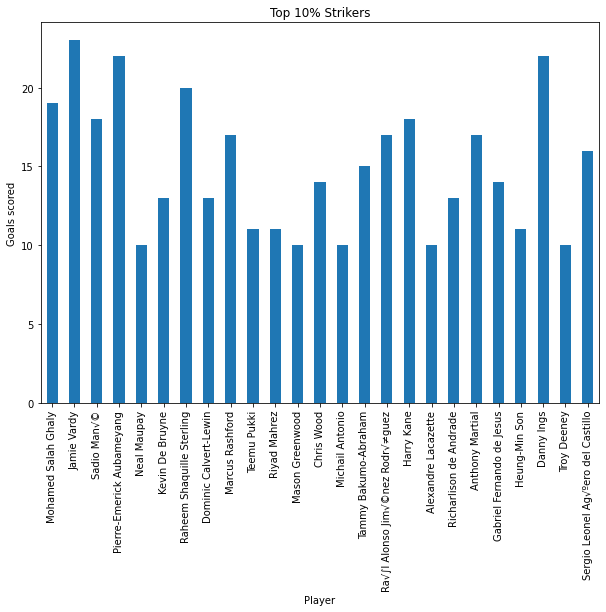

In [108]:
df_top10 = top10_goals_strikers(0.1, df)
print(df_top10)

In [131]:
# let's calculate our own perfromance measure and store the data in a different data frame
def analyze_performance(df):
    """
    This function creates a new DataFrame with two columns: Player Name and Productivity, Consistency
    Productivity tells us how many minutes a player needed to achieve a scoring point

    Calculate the value for the productivity as follow: SUM(Goals + Assists) / Minutes played
    Return a new DataFrame that contains only the name of the player and its productivity

    :param df: The DataFrame containing all the players for which we want to calculate the productivity.
    """
    # calculate the productivity
    df.loc[:, 'Productivity'] = (df.loc[:, 'G'] + df.loc[:, 'ASST']) / df.loc[:,'MIN']
    return df

In [132]:
# now let's merge the two dataframes together / by adding the addition performance_score column to the original dataframe
df_top10 = analyze_performance(df_top10)
print(df_top10)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


> **So which player should we buy?**

We know the goals, assists and productivty of the top 10% goal-scoring strikers from the past Premier League season. Let's visualize these data in one single diagram with three bars for each player. 
 
However, to do so we first need to normalize the data because how are we gonna display the values 0.007456 and 23 in the same diagram? What scale should we use on the y-axis?

We can do the normalization with the following formula:

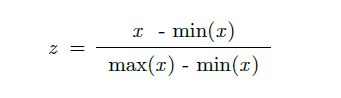

In [134]:
def normalize(series):
  """
  Normalizes the data of a Pandas Series and returns the noralized new series.

  :param series: The pandas series to be normalized, e.g. all values in a column of a DataFrame.

  Return the nromalized pandas Series
  """

  # let's calculate the min value
  minx = min(series) 

  # let's caluclate the max value
  maxx = max(series)

  # let's calcualte the normalized value for the whole series
  series = series.apply(lambda x: (x-minx) / (maxx - minx))

  return series

In [138]:
# let's normalize the data
df_top10['G'] = normalize(df_top10['G'])
df_top10['ASST'] = normalize(df_top10['ASST'])
df_top10['Productivity'] = normalize(df_top10['Productivity'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [210]:
# let's viaualize the top 10 performers with their accoridng goals, assists and productivity so that we can draw a conclusion
def visualize(df):
    """
    Plots the columns GOALS, ASSISTS and Productivity of all the players included in the df.

    For each of the three attributes every player should get one bar in the chart.

    Additionally:
        - use the player name for the x-axis
        - rotate the Name so it is readable from bottom to top
        - set the figure size to be 1000x700 pixels

    :param df: A dataframe containing the players data.
    """

    # let's first sort the dataframe based on the Productivity column
    df = df.sort_values('Productivity', ascending=False)

    # lets extract the y values first
    y_data = df.loc[:, ['G','ASST','Productivity']].values.tolist()

    plt.figure(figsize=(30,5))


    y_data0 = [x[0] for x in y_data]
    y_data1 = [x[1] for x in y_data]
    y_data2 = [x[2] for x in y_data]

    # now we have to define for each player where his bars should be located on the x-axis
    xvals1 = [x for x in range(len(y_data))]
    xvals0 = [x-0.2 for x in xvals1]
    xvals2 = [x+0.2 for x in xvals1]


    # add all three bar-groups to the chart
    plt.bar(xvals0, y_data0, width = 0.2, color='cyan', label="Goals")
    plt.bar(xvals1, y_data1, width = 0.2, color='orange', label="Assists", tick_label=df['PLAYER'])
    plt.bar(xvals2, y_data2, width = 0.2, color='blue', label="Productivity")
    plt.xticks(rotation='vertical')
  

    plt.xlabel("Player")
    plt.ylabel("Goals scored")
    plt.title("Top 10% Strikers")

    plt.legend()

    plt.show()


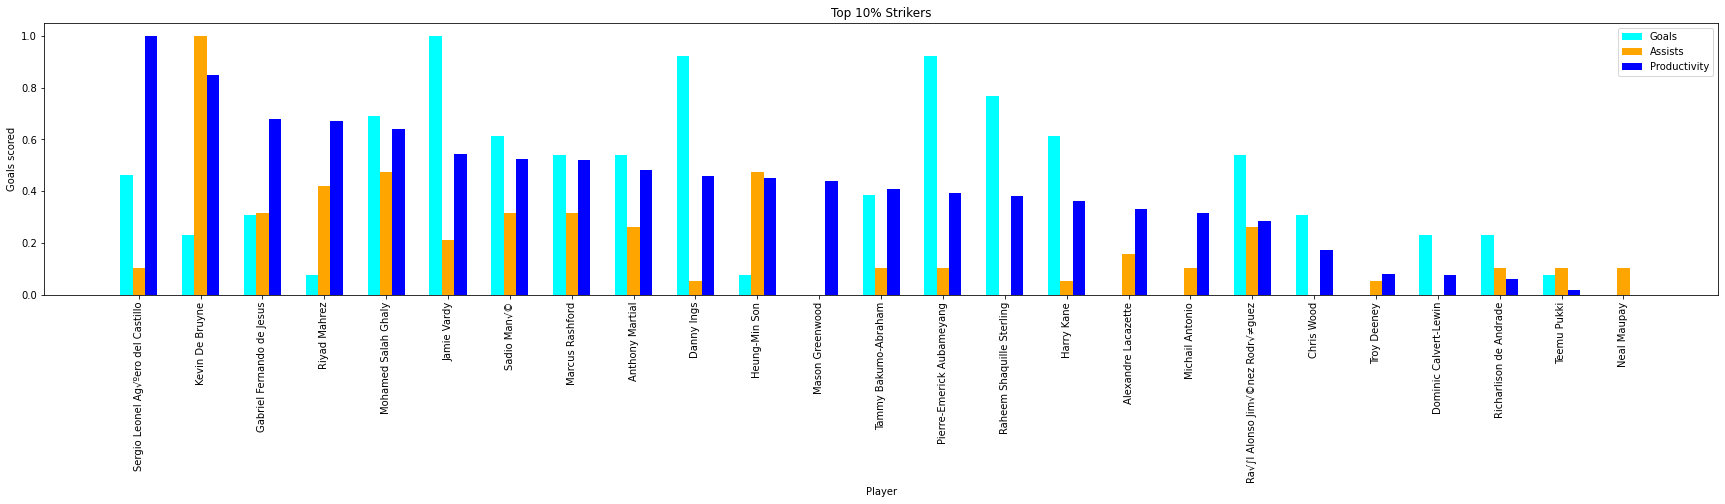

In [211]:
# which one would you buy?
visualize(df_top10)

I honnestly think we need to put the productivity somwhoe in relation to the games played...

Let's see next week how we can do that (I don't know yet haha 😂 )